In [1]:
##importint dataset from library
from sklearn import datasets
iris=datasets.load_iris()

In [2]:
#converting dataset into dataframe 
import pandas as pd
df=pd.DataFrame(iris.data)
import numpy as np

In [3]:
# here we have our iris data 
print(iris.feature_names)
#dataset whose label =0
d1=df.iloc[0:49,:]
print(d1.head())
#dataset whose label =1
d2=df.iloc[50:99,:]
print(d2.head())
#dataset whose label =2
d3=df.iloc[100:149,:]
print(d3.head())

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
      0    1    2    3
50  7.0  3.2  4.7  1.4
51  6.4  3.2  4.5  1.5
52  6.9  3.1  4.9  1.5
53  5.5  2.3  4.0  1.3
54  6.5  2.8  4.6  1.5
       0    1    2    3
100  6.3  3.3  6.0  2.5
101  5.8  2.7  5.1  1.9
102  7.1  3.0  5.9  2.1
103  6.3  2.9  5.6  1.8
104  6.5  3.0  5.8  2.2


In [4]:
target=pd.DataFrame(iris.target)
type(target)

pandas.core.frame.DataFrame

In [5]:
from sklearn import cross_validation as cv

/home/shailesh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
#dividing data into train set and test set
#x_train ,x_test contains our features and eg: sepal length,width
#y_train, y_test contains our label(or target value) eg: type of iris
x_train,x_test,y_train,y_test=cv.train_test_split(df,target,test_size=0.2)

In [7]:
x_train.describe()

,0,1,2,3
count,120.000000,120.000000,120.000000,120.000000
mean,5.868333,3.030833,3.861667,1.237500
std,0.844257,0.416427,1.756150,0.761915
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.750000,3.000000,4.300000,1.300000
75%,6.425000,3.300000,5.225000,1.825000
max,7.900000,4.200000,6.900000,2.500000


In [8]:
x_train.iloc[:,1].var()
import math as m

In [9]:
u=x_train.iloc[:,1].mean()
v=x_train.iloc[:,1].var()
p=3.14
u

3.0308333333333337

In [10]:
z=x_train.iloc[:,1].min()
x1=[]
x2=[]

while(z<=x_train.iloc[:,1].max()):
    x1.append(z)
    x2.append((1/(m.sqrt(2*p*v)))*(1/(np.exp((z-u)**2/(2*v)))))
    z+=0.03
    

In [11]:
import matplotlib.pyplot as plt

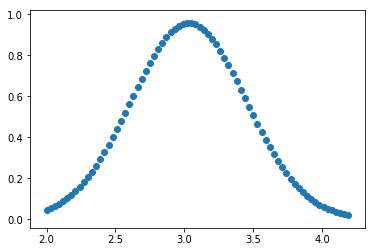

In [12]:
#normal or gaussian graph
# at mean probability is maximum
plt.scatter(x1,x2)

In [13]:
##gaussian naive bayes from scratch

In [18]:
def findprob(df,x):    #find probability using normal distribution for continuous
    u=df.mean();
    v=df.var();
    p=(1/(m.sqrt(2*3.14*v)))*(1/(np.exp((x-u)**2/(2*v))))   #gaussian formula
    return p


def naivebayes(df,target,x1,y_pre):
    pi=[]                              #list that store different target value and there probability
    x=target.iloc[:,0].unique()       #creating unique target list eg: 0,1,2.
    for i in range(len(x)):          #looping through each x value  
        p=1                         #calculating probability given that target is x[i]  eg:x=0,x=1,x=2
        d=df[target.iloc[:,0]==x[i]]  #creating datasets given that target is x[i]
        for j in range(d.shape[1]):   #looping through each column of dataset that is created for given target
            temp=findprob(d.iloc[:,j],x1[j])   #now calculating probability for given point eg p(x1(i))
            p*=temp                           #calculating p(x1)*p(x2)*p(x3)*..........
        temp=len(target[target[0]==x[i]])/len(target)  #calculating probability of given target eg: p(y=yi)
        pi.append([x[i],temp*p])               #appendding target and there probability  eg:[0,0.9],[1,0.1],[2,0.1]
    m=0
    for i in range(len(pi)):              # finding maximum probability target in pi[] list
        if(pi[i][1]>m):                   #and storing there target value in predicted value
            m=pi[i][1]
            y=i;
    y_pre.append(pi[y][0])
    return y_pre
        
#driver function
def naiverun(df,target,test):
    y_pre=[]                               #creating our predicted value list
    for i in range(test.shape[0]):         #looping through each test data
        xi=test.iloc[i]
        y_pre=naivebayes(df,target,xi,y_pre)     #calculating predicted value for xi
    return y_pre
    
# calculate precision
def precision(y_pre,y_test):
    count=0                                   #finding accuracy
    for i in range(len(y_pre)):
        if(y_pre[i]==y_test.iloc[i,0]):
            count=count+1
    print(count/len(y_pre))                     #print accuracy
    print(count)                                #print total correct predictions
    print(len(y_pre))                           #print total nomber of dataset

In [19]:
y_pre=naiverun(x_train,y_train,x_test)
precision(y_pre,y_test)

0.9333333333333333
28
30


In [16]:
print(y_test.iloc[:,0],y_pre)

90     1
13     0
145    2
42     0
14     0
5      0
56     1
77     1
21     0
125    2
15     0
50     1
83     1
17     0
78     1
1      0
8      0
36     0
63     1
126    2
110    2
114    2
68     1
85     1
111    2
62     1
91     1
19     0
39     0
12     0
Name: 0, dtype: int64 [1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0, 0]
